## CS-5312 Big Data Analytics
#### Assignment 2:  

### Guidelines and Instructions:

• Deadline to submit the Assignment is Wednesday, Feburary 24, 2021 at 11 : 55 pm.

• Rename this notebook to yourID_Fullname_Assignment_2.


• You are required to do the Assignment tasks in Python (Jupyter Notebook).


• Along with this notebook(.ipynb file) also submit the html version of this.


• In case of any query, please feel free to write us an email.

In this assignment you will get hands-on experience with distance/similarity computations. You will compute pairwise similarities various definitions, nearest neighbors and will also learn about heat maps and get some practice on **TF-IDF**.

You will be using **Twenty Newsgroups Data Set from UCI repository** in this assignment. Description of the dataset is provided in the folder.



We will use the following distance/similarity measures (metrics)


1.   **Jaccard Distance** (for bags of words)  $J(x,y) = \dfrac{\sum_{i=1}^{N} min(x_i,y_i)}{\sum_{i=1}^{N} max(x_i,y_i)}$

    1. **Jaccard similarity** = $1-J(x,y)$
    
    
2.  $L_2$ **Distance (or Euclidean distance)** $d(x,y) = \vert\vert x-y\vert\vert_2= \sqrt{\sum_{i=1}^{N} \vert x_i-y_i\vert^2} $
    
    2. Euclidean similarity is (generally) defined as $H(x,y) = - d(x,y)$
    
    
3. **Cosine Similarity** $CosineSim(x,y) = \left( \dfrac{x \cdot y}{\vert\vert x\vert\vert_2 \vert\vert y\vert\vert_2} \right)$
   
    
    


# Proximity computations on 20 newsgroups dataset

In this part you will compute proximities between the posts in the well-known 20 newsgroups dataset. You will use a version of the dataset where every article is represented by a bag-of-words.
You will need $3$ files: data50.csv, label.csv, and group.csv. In data50.csv there is a sparse representation of the bags-of-words, with each row containing $3$ fields: {articleId}, {wordId}, and {count}.
Article with their group labels have been given in the file label.csv, where line $i$ represents the {groupId} for {articleId} $i$. And group.csv has group names,with line $i$ containing the name of group $i$. 
   
You are required to explore the dataset: get yourselves familiar with each file and the information contained therein. Names of groups, number of article (total and groupwise), number of words, most frequent words, and all format specifications etc. Import the data sets into python notebook. Remember the total number of words is huge, so you probably would want to use a sparse representation. You have to perform following tasks and report your findings.

In [74]:
import pandas as pd

data = pd.read_csv(r'data50.csv')
label = pd.read_csv(r'label.csv')
group = pd.read_csv(r'groups.csv')

'''
In data50.csv there is a sparse representation of the bags-of-words, with each row containing 3 fields: articleId, 
wordId, and count.

To find out which group an article belongs to, use the file label.csv, where for articleId i, line i in label.csv 
contains the groupId. 

Finally the group name is in group.csv, with line i containing the name of group i.

'''
#Understanding the data (Optional)
print('Number of Articles', len(set(data['ArticleID'])))
print('Total number of words = ', len(set(data['WordID']) ))
print('Count of Most Frequent Word = ', data['Count'].max())
print('Mean count of Words = ', data['Count'].mean())

#removing words from BoW that have count ≤2


'''
for i in set(data['3']):
    m = data[data['3'] == i]['1.1'].mean()
    if m < 2 or m > 50:
        data = data[data['3'] != i]

print('After vocabulary truncation')
print('Total number of words = ', len(set(data['3'])))
print('Count of Most Frequent Word = ', data['1.1'].max())
print('Mean count of Words = ', data['1.1'].mean())

'''

Number of Articles 1000
Total number of words =  19575
Count of Most Frequent Word =  442
Mean count of Words =  1.8707886854213631


"\nfor i in set(data['3']):\n    m = data[data['3'] == i]['1.1'].mean()\n    if m < 2 or m > 50:\n        data = data[data['3'] != i]\n\nprint('After vocabulary truncation')\nprint('Total number of words = ', len(set(data['3'])))\nprint('Count of Most Frequent Word = ', data['1.1'].max())\nprint('Mean count of Words = ', data['1.1'].mean())\n\n"

1. Implement the three similarity metrics described above.

In [79]:
# make functions for each measure
import math


def jaccard(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    J = float(intersection) / union
    return (1-J)


def euclidean_distance(x,y):
    return math.sqrt(sum(pow(a-b,2) for a, b in zip(x, y)))

def square_rooted(x):
    return round(math.sqrt(sum([a*a for a in x])),3)
  
def cosine_similarity(x,y):
    numerator = sum(a*b for a,b in zip(x,y))
    denominator = square_rooted(x)*square_rooted(y)
    return round(numerator/float(denominator),3)

2. For each metric, compute the pairwise similarity matrix (a $1000 \times 1000$ real matrix $S$, where $S(i, j)$ is the similarity of article $i$ and article $j$. You may visualize this matrix as a heatmap.

In [87]:
# Insert your code here



import numpy as np

jacc = np.zeros((1000, 1000))
euclid = np.zeros((1000, 1000))
cos = np.zeros((1000, 1000))



for i in range (1000):
    lst1 = data[data['ArticleID']==i+1]['WordID']
    for j in range (1000):
        lst2 = data[data['ArticleID']==j+1]['WordID']
        jacc[i][j] = jaccard(lst1, lst2)
        euclid[i][j] = euclidean_distance(lst1, lst2)
        cos[i][j] = cosine_similarity(lst1, lst2)


Text(0.5, 24.0, 'Cosine Similarity')

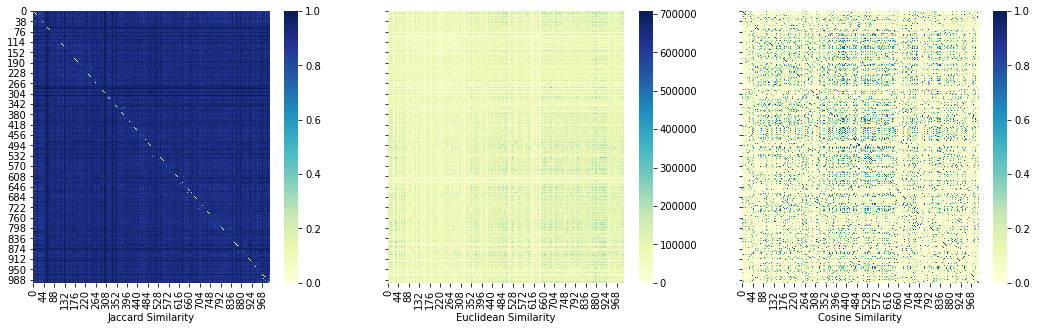

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt
f,(ax1,ax2,ax3) = plt.subplots(1,3, sharey=True, figsize=(18,5))
g1 = sns.heatmap(jacc,cmap="YlGnBu",cbar=True,ax=ax1)
g1.set_xlabel('Jaccard Similarity')

g2 = sns.heatmap(euclid,cmap="YlGnBu",cbar=True,ax=ax2)
g2.set_xlabel('Euclidean Similarity')


g3 = sns.heatmap(cos,cmap="YlGnBu",cbar=True,ax=ax3)
g3.set_xlabel('Cosine Similarity')

3. For each similarity metric, populate a $20 \times 20$ matrix. Rows and columns are indexed by newsgroups (in the same order). Each entry $(x,y)$ of the matrix, is the average similarity of all pairs of articles from group $x$ and group $y$. Note that is just the average of the corresponding blocks (submatrices) of the similarity matrix made in the last part. Plot this $20\times 20$ matrix as a heat-map. Provide appropriate labels (group names) and pick an appropriate color-map to represent the data: the rainbow color-map may look fancy, a simple color map from white to blue may be a lot more insightful. Include a meaningful legend.

In [206]:
jacc_group = np.zeros((20, 20))
euclid_group = np.zeros((20, 20))
cos_group = np.zeros((20, 20))
for i in range (20):
    x = i*50
    y = 0 
    for j in range (20):
        y = j*50
        jacc_group[i][j] = jacc[x:x+50 ,y:y+50].mean()
        euclid_group[i][j] = euclid[x:x+50 ,y:y+50].mean()
        cos_group[i][j] = cos[x:x+50 ,y:y+50].mean()

Text(0.5, 1.0, 'Jackard Similarity Group Wise ')

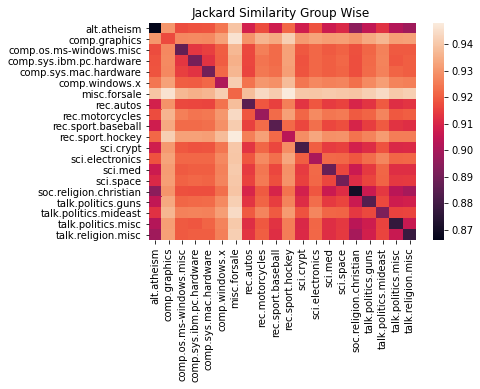

In [217]:
#For Jackard Similarity

sns.heatmap(jacc_group,cbar=True, xticklabels= group['GroupName'], yticklabels= group['GroupName'])
plt.title('Jackard Similarity Group Wise ')

Text(0.5, 1.0, 'Euclidean Similarity Group Wise ')

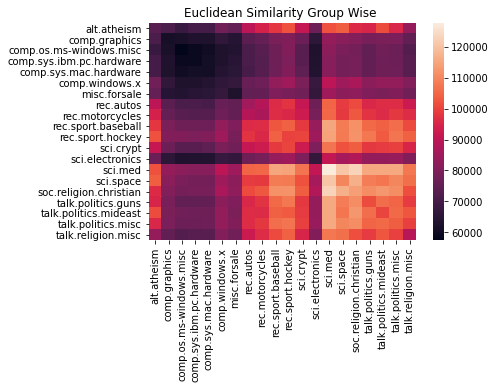

In [218]:
#For Euclidean Similarity

sns.heatmap(euclid_group,cbar=True, xticklabels= group['GroupName'], yticklabels= group['GroupName'])
plt.title('Euclidean Similarity Group Wise ')

Text(0.5, 1.0, 'Cosine Similarity Group Wise ')

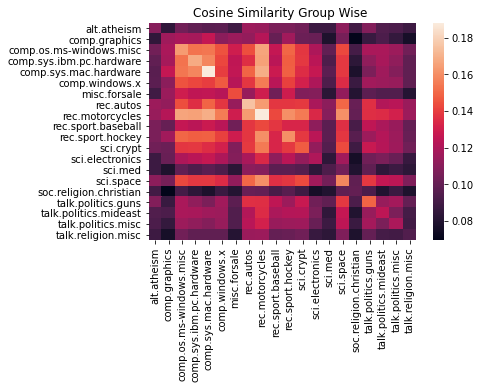

In [220]:
#For Cosine Similarity

sns.heatmap(cos_group,cbar=True, xticklabels= group['GroupName'], yticklabels= group['GroupName'])
plt.title('Cosine Similarity Group Wise ')

4. Analyze the three heat-maps (corresponding to three similarity measures), which measure is more appropriate? What properties you expected in such a heat-map? Which similarity measure meets your expectations? Are the low and highly similar newsgroups expected, why? 

In [ ]:
'''
A heat map should show a color-coding to represent different values. In the heatmaps presented above, there should be 
a high similarity of an article type with itself, and the heatmap should be symmetric around the diagonal. 

These properties are most visible in the heatmap created via Jaccard Similarity, which is therefore the most 
appropriate measure.

'''

5. Now compute another $20 \times 20$ matrix as follows: For each article $a_i$, find the article $a_j$ from a **different** newsgroup that has the largest similarity with $a_i$ (the nearest neighbor of $a_i$ in any other group). (You may do this with brute-force search.) For each pair of groups $(x,y)$, count how many articles in group $x$ have their nearest-neighbors in group $y$. Plot a heat-map of this matrix

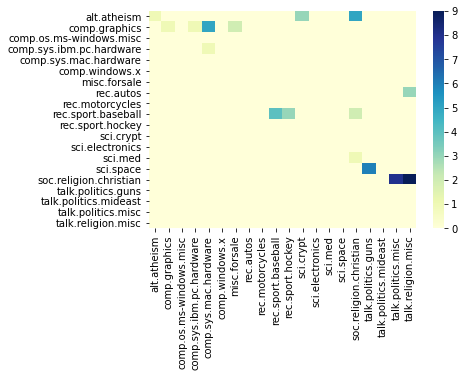

In [515]:
grp = np.zeros((20, 20))
        
for i in range (20):
    rows = jacc[i*50:i*50+50, :]
    rows_of_interest = np.delete(rows, slice(i*50,i*50+50), 1)
    smallest_dist = rows_of_interest.min()
    smallest_dist_pair = np.where(jacc == smallest_dist)[0]
    grp_num_of_x = label.iloc[smallest_dist_pair[0]][0]
    grp_num_of_y = label.iloc[smallest_dist_pair[1]][0]
    
    #how many of the 10 nearest neighbours of group x lie in group y
    k = 10
    num_of_nearest_neighbours = 0
    sorted_rows_of_interest = np.sort(rows_of_interest.ravel()) 
    nearest_dists = sorted_rows_of_interest[:k]
    for h in nearest_dists:
        num_of_nearest_neighbours += ((label.iloc[np.where(jacc == h)[0][1]] == grp_num_of_y)[0]+0)
    
    
    grp[grp_num_of_x-1][grp_num_of_y-1] = num_of_nearest_neighbours  

sns.heatmap(grp,cbar=True,cmap="YlGnBu",  xticklabels= group['GroupName'], yticklabels= group['GroupName'])

6. Your plot for part (3) was symmetric, but for part (5) it may be asymmetric. Explain such observations? Argue what would one expect from such matrix and are the expectation met?


In [ ]:
'''
The plot of part 5 is asymmetric and this was expected because only the nearest neighbours of group x in group y
are taken into account and not the inverse. When we do this, it is understood that an article in group x may have a 
nearest neighbour in group y but when the metrics of group y are looked at, they may have nearest neighbours in 
a group other than x. 

However, the nearest neighbours of x in y show which group x is closest to, and symmetry is not important when such
information is needed. 

For instance, biggest city near Alexandria is Washington DC but biggest city near Washingotn DC is Philadelphia. 
Hence, symmetry is not expected from such a graph and this expectation is met in the heatmap above. 

'''

7. Which groups seem more similar? Are there any common characteristics in the plots from part (3) and part (5)? Which plot is more insightful?       	


In [ ]:
'''
Group 1, 3,8 and 20 have a moderately high similarity with other groups in the dataset. 

Plot(3) shows the average distance of one group to another whereas plot(5) shows the nearest neighbours of elements 
in one group to another. Plot(5) is more insightful when one is interested in knowing the tendency of an article in 
one group to be similar to that of another group. Plot(3) is more insightful when one is interested in knowing how
similar on average two groups are in terms of the articles they contain. 
'''

## Part-2: TF-IDF 

1. Now take the **TF-IDF** representation of each document by selecting the top $x$ words by **TF-IDF** score. It will help if you store each document as a row in the data matrix.  Note that in the **TF-IDF** matrix, all non-top words would be set to 0 while top-$x$ words would have some **TF-IDF** score. Use $x = 10, 50, 100$. 



In [713]:
import math
def TF (i,j):
    #return normalized frequency of term i in document j 
    
    if (len((data[(data['ArticleID']==j) & (data['WordID']== i)]))== 0):
        return 0
    f_ij = int(data[(data['ArticleID']==j) & (data['WordID']== i)]['Count'])
    max_f_ij = data[(data['ArticleID']==j)]['Count'].max()
    return (f_ij/max_f_ij)

    
def IDF (i):
    #returns weight/importance of word i 
    
    n_i = len(data[data['WordID'] == i])
    N = data['ArticleID'].nunique()
    
    return (math.log(N/(n_i+1)))

    
def TF_IDF (i,j):
    #returns TF_IDF of term i in document j 
    
    return (TF(i,j)* IDF(i))


#creating TD-IDF representation of data, x=100 is taken as x=10 and x=50 can be extracted from 
#it

tf_idf_matrix = np.zeros((1000, data['WordID'].nunique()))
word_index = list(set(data['WordID']))


for j in range (1000):
    document = data[data['ArticleID']==j+1]
    for i in document['WordID']:
        tf_idf_matrix[j][word_index.index(i)] = TF_IDF(i,j+1)
        
        
        

In [724]:
#keeping only top x values

tf_idf_100 = np.zeros((1000, data['WordID'].nunique()))
tf_idf_50 = np.zeros((1000, data['WordID'].nunique()))
tf_idf_10 = np.zeros((1000, data['WordID'].nunique()))

import heapq
def keep_k(k, arr): 
    smallest = heapq.nlargest(k, arr)[-1]  
    arr[arr < smallest] = 0 
    return arr 

for i in range(1000):
    tf_idf_100[i] = np.array(keep_k(100, tf_idf_matrix[i]))
    tf_idf_50[i] = np.array(keep_k(50, tf_idf_matrix[i]))
    tf_idf_10[i] = np.array(keep_k(10, tf_idf_matrix[i]))

2. For each value of $x$, construct the similarity matrix by using all three similarity measures described above. Use points in a sorted order by groups. Plot these similarities matrices using heat-maps with appropriate labels and legend. 



In [814]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import pairwise_distances

#x=100
similar_tf100_jacc = pairwise_distances(tf_idf_100, metric="jaccard")
similar_tf100_euclid = euclidean_distances(tf_idf_100)
similar_tf100_cos = cosine_similarity(tf_idf_100)

#x=50
similar_tf50_jacc = pairwise_distances(tf_idf_50, metric="jaccard")
similar_tf50_euclid = euclidean_distances(tf_idf_50)
similar_tf50_cos = cosine_similarity(tf_idf_50)

#x=10
similar_tf10_jacc = pairwise_distances(tf_idf_10, metric="jaccard")
similar_tf10_euclid = euclidean_distances(tf_idf_10)
similar_tf10_cos = cosine_similarity(tf_idf_10)



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


Text(0.5, 24.0, 'Cosine Similarity')

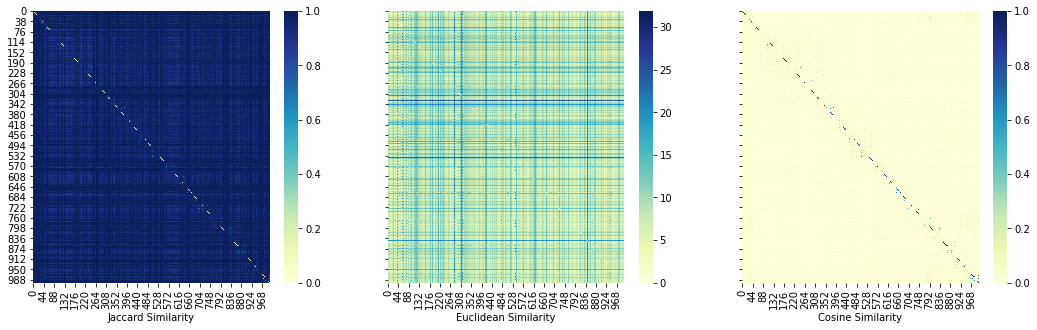

In [797]:
import seaborn as sns
import matplotlib.pyplot as plt

#x=100
f,(ax1,ax2,ax3) = plt.subplots(1,3, sharey=True, figsize=(18,5))
g1 = sns.heatmap(similar_tf100_jacc,cmap="YlGnBu",cbar=True,ax=ax1)
g1.set_xlabel('Jaccard Similarity')

g2 = sns.heatmap(similar_tf100_euclid,cmap="YlGnBu",cbar=True,ax=ax2)
g2.set_xlabel('Euclidean Similarity')


g3 = sns.heatmap(similar_tf100_cos,cmap="YlGnBu",cbar=True,ax=ax3)
g3.set_xlabel('Cosine Similarity')

Text(0.5, 24.0, 'Cosine Similarity')

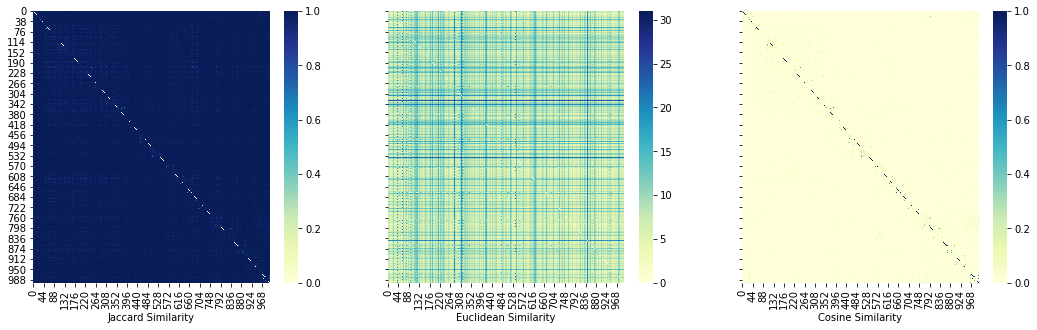

In [798]:
#x=50
f,(ax1,ax2,ax3) = plt.subplots(1,3, sharey=True, figsize=(18,5))
g1 = sns.heatmap(similar_tf50_jacc,cmap="YlGnBu",cbar=True,ax=ax1)
g1.set_xlabel('Jaccard Similarity')

g2 = sns.heatmap(similar_tf50_euclid,cmap="YlGnBu",cbar=True,ax=ax2)
g2.set_xlabel('Euclidean Similarity')


g3 = sns.heatmap(similar_tf50_cos,cmap="YlGnBu",cbar=True,ax=ax3)
g3.set_xlabel('Cosine Similarity')

Text(0.5, 24.0, 'Cosine Similarity')

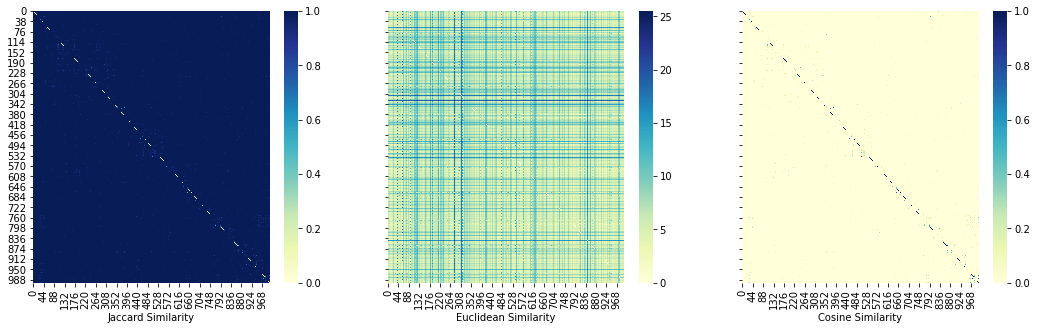

In [799]:
#x=10
f,(ax1,ax2,ax3) = plt.subplots(1,3, sharey=True, figsize=(18,5))
g1 = sns.heatmap(similar_tf10_jacc,cmap="YlGnBu",cbar=True,ax=ax1)
g1.set_xlabel('Jaccard Similarity')

g2 = sns.heatmap(similar_tf10_euclid,cmap="YlGnBu",cbar=True,ax=ax2)
g2.set_xlabel('Euclidean Similarity')


g3 = sns.heatmap(similar_tf10_cos,cmap="YlGnBu",cbar=True,ax=ax3)
g3.set_xlabel('Cosine Similarity')

3. Find out top $100$ most similar pairs of documents by each similarity measure (essentially get the top $100$ non-diagonal entries from the similarity matrix). Note that this will make $9$ experiments in total i.e. $3$ similarity measures and $3$ values for $x$. For each experiment, report how many of the retrieved pairs of documents belong to the same group and mention which experiment configuration returns highest numbers of pairs belonging to same group.

**Please note that a document will always have a similarity of $1$ with itself so do not use that in any experiment**

In [972]:
#x=100

print('for x=100')

#Jaccard Similarity, 
grps =  np.zeros((20,20))

#smaller values more similar
j100 = similar_tf100_jacc
j100[j100==0]= j100.max()
sort = np.sort(j100.ravel()) #in ascending order, pick first 100
sort = sort[:100]
for i in sort:
    pair = np.where(similar_tf100_jacc == i)[0]
    grp_num_of_x = label.iloc[pair[0]][0]
    grp_num_of_y = label.iloc[pair[1]][0]
    grps[grp_num_of_x-1][grp_num_of_y-1]+=1
    
match = (np.where(grps == grps.max()))[0]
print('The following groups have the highest number of similar pairs with Jaccard Similarity: ')
for i in range(len(match)):
    print(match[i])
    
print('-----------')




#Cos Similarity, 
grps =  np.zeros((20,20))

#smaller values more similar
j100 = similar_tf100_cos
j100[j100==0]= j100.max()
sort = np.sort(j100.ravel()) #in ascending order, pick first 100
sort = sort[:100]
for i in sort:
    pair = np.where(similar_tf100_cos == i)[0]
    grp_num_of_x = label.iloc[pair[0]][0]
    grp_num_of_y = label.iloc[pair[1]][0]
    grps[grp_num_of_x-1][grp_num_of_y-1]+=1
    
match = (np.where(grps == grps.max()))[0]
print('The following groups have the highest number of similar pairs with Jaccard Similarity: ')
for i in range(len(match)):
    print(match[i])
    
print('-----------')



for x=100
The following groups have the highest number of similar pairs with Jaccard Similarity: 
4
17
19
-----------
The following groups have the highest number of similar pairs with Jaccard Similarity: 
6
-----------


In [973]:
print('for x=50')

#Jaccard Similarity, 
grps =  np.zeros((20,20))

#smaller values more similar
j100 = similar_tf50_jacc
j100[j100==0]= j100.max()
sort = np.sort(j100.ravel()) #in ascending order, pick first 100
sort = sort[:100]
for i in sort:
    pair = np.where(similar_tf50_jacc == i)[0]
    grp_num_of_x = label.iloc[pair[0]][0]
    grp_num_of_y = label.iloc[pair[1]][0]
    grps[grp_num_of_x-1][grp_num_of_y-1]+=1
    
match = (np.where(grps == grps.max()))[0]
print('The following groups have the highest number of similar pairs with Jaccard Similarity: ')
for i in range(len(match)):
    print(match[i])
    
print('-----------')




#Cos Similarity, 
grps =  np.zeros((20,20))

#smaller values more similar
j100 = similar_tf50_cos
j100[j100==0]= j100.max()
sort = np.sort(j100.ravel()) #in ascending order, pick first 100
sort = sort[:100]
for i in sort:
    pair = np.where(similar_tf50_cos == i)[0]
    grp_num_of_x = label.iloc[pair[0]][0]
    grp_num_of_y = label.iloc[pair[1]][0]
    grps[grp_num_of_x-1][grp_num_of_y-1]+=1
    
match = (np.where(grps == grps.max()))[0]
print('The following groups have the highest number of similar pairs with Jaccard Similarity: ')
for i in range(len(match)):
    print(match[i])
    
print('-----------')



for x=50
The following groups have the highest number of similar pairs with Jaccard Similarity: 
2
-----------
The following groups have the highest number of similar pairs with Jaccard Similarity: 
6
-----------


In [974]:
print('for x=10')

#Jaccard Similarity, 
grps =  np.zeros((20,20))

#smaller values more similar
j100 = similar_tf10_jacc
j100[j100==0]= j100.max()
sort = np.sort(j100.ravel()) #in ascending order, pick first 100
sort = sort[:100]
for i in sort:
    pair = np.where(similar_tf10_jacc == i)[0]
    grp_num_of_x = label.iloc[pair[0]][0]
    grp_num_of_y = label.iloc[pair[1]][0]
    grps[grp_num_of_x-1][grp_num_of_y-1]+=1
    
match = (np.where(grps == grps.max()))[0]
print('The following groups have the highest number of similar pairs with Jaccard Similarity: ')
for i in range(len(match)):
    print(match[i])
    
print('-----------')




#Cos Similarity, 
grps =  np.zeros((20,20))

#smaller values more similar
j100 = similar_tf10_cos
j100[j100==0]= j100.max()
sort = np.sort(j100.ravel()) #in ascending order, pick first 100
sort = sort[:100]
for i in sort:
    pair = np.where(similar_tf10_cos == i)[0]
    grp_num_of_x = label.iloc[pair[0]][0]
    grp_num_of_y = label.iloc[pair[1]][0]
    grps[grp_num_of_x-1][grp_num_of_y-1]+=1
    
match = (np.where(grps == grps.max()))[0]
print('The following groups have the highest number of similar pairs with Jaccard Similarity: ')
for i in range(len(match)):
    print(match[i])
    
print('-----------')



for x=10
The following groups have the highest number of similar pairs with Jaccard Similarity: 
0
-----------
The following groups have the highest number of similar pairs with Jaccard Similarity: 
3
18
-----------
